In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
path = untar_data(URLs.PASCAL_2012)

In [ ]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,2008_000002.jpg,tvmonitor,True
1,2008_000003.jpg,train person,True
2,2008_000007.jpg,boat,True
3,2008_000008.jpg,horse person,False
4,2008_000009.jpg,cow,True


In [ ]:
dblock = DataBlock()
dsets = dblock.datasets(df)
len(dsets.train),len(dsets.valid)

(9232, 2308)

In [ ]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')

In [ ]:
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid

In [ ]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
# Find the address of images
dls = dblock.dataloaders(df)

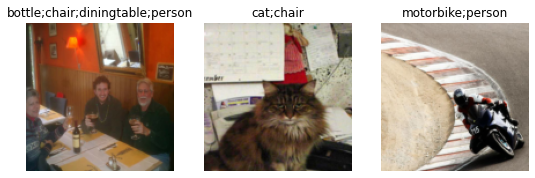

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.864116,0.615356,0.232595,01:08
1,0.576629,0.233836,0.728138,01:08
2,0.231194,0.113487,0.943294,01:07
3,0.145059,0.107697,0.946574,01:07


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.115294,0.104791,0.950240,01:10
1,0.101281,0.094330,0.955427,01:10
2,0.081579,0.091480,0.956672,01:10


In [ ]:
learn.export('nn_desafio5.pkl')